# Capstone Project - Retail-Analysis-with-Walmart-Data-Project

# Table of Contents
    1. Problem Statement
    2. Project Objective
    3. Data Description
    4. Data Pre-processing Steps and Inspiration
    5. Choosing the Algorithm for the Project
    6. Motivation and Reasons For Choosing the Algorithm
    7. Assumptions
    8. Model Evaluation and Techniques
    9. Inferences from the Same
    10. Future Possibilities of the Project
    11. Conclusion
    12. References

# Problem Statement

The decision makers of Walmart should be able to analyze the effect of various factors affecting the sales of the products in their stores.

# Project Objective
 

#### 1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:
    a. If the weekly sales are affected by the unemployment rate, if yes - which stores
    are suffering the most?
    b. If the weekly sales show a seasonal trend, when and what could be the reason?
    c. Does temperature affect the weekly sales in any manner?
    d. How is the Consumer Price index affecting the weekly sales of various stores?
    e. Top performing stores according to the historical data.
    f. The worst performing store, and how significant is the difference between the
    highest and lowest performing stores.


#### 2. Use predictive modelling techniques to forecast the sales for each store for the next 12 weeks.

# Data Description

#### Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

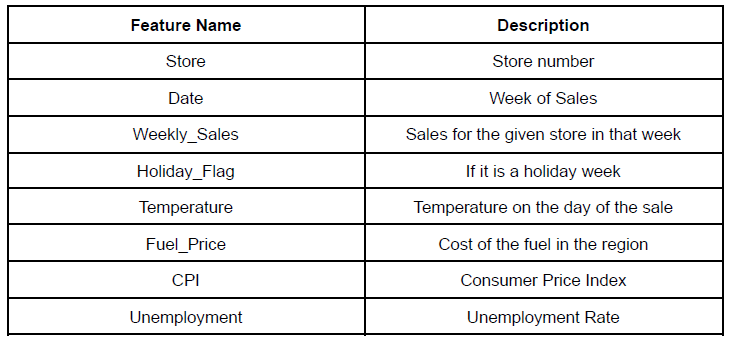 

# 2. Use predictive modelling techniques to forecast the sales for each store for the next 12 weeks

# Data Preprocessing Steps And Inspiration

The preprocessing of the data included the following steps:
1. First step : Imported all required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import CSV_EDA  # Created a python class Called CSV_EDA for Data reading, cleaning and processing.

2. Reading the data by calling class CSV_EDA.ReadCSVFile using csvReader object

In [2]:
csvRader = CSV_EDA.ReadCSVFile('Walmart.csv')

3. getdata method returns data frame after reading Walmart.csv file and assigned the dataframe into w_data variable.

In [3]:
w_data = csvRader.getdata()

4. viewing the first 5 records from the dataframe.

In [4]:
w_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


5. Analysig data statistics 

In [5]:
no_of_store = w_data.nunique()
no_of_store

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

6. Checking duplicate where it shows no duplicate records

In [6]:
w_data.duplicated().sum()

0

7. Checking if there is any null values

In [7]:
w_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

8. Checking data information details.

# Solving all Queries which are stated in 1st part in the Objective.

# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

Step 1: Created a data frame weekly_sales_vs_Unemployment_df to get storewise and unimployment wise of weekly sales.

In [8]:
weekly_sales_vs_Unemployment_df = w_data.groupby(['Store','Unemployment'])["Weekly_Sales"].sum()
weekly_sales_vs_Unemployment_df = weekly_sales_vs_Unemployment_df.reset_index()
weekly_sales_vs_Unemployment_df['Unemployment'] =weekly_sales_vs_Unemployment_df['Unemployment'].astype(int)
weekly_sales_vs_Unemployment_df = weekly_sales_vs_Unemployment_df.groupby(['Store','Unemployment'])["Weekly_Sales"].sum()
weekly_sales_vs_Unemployment_df = weekly_sales_vs_Unemployment_df.reset_index()
weekly_sales_vs_Unemployment_df.shape

(129, 3)

In [9]:
weekly_sales_vs_Unemployment_df.head()

,Store,Unemployment,Weekly_Sales
0,1,6,2.649954e+07
1,1,7,1.837246e+08
2,1,8,1.217864e+07
3,2,6,5.696847e+07
4,2,7,1.006459e+08


Step 2: Created 2nd data frame Storewise_min_max_Unemployment_df based on 1st data frame weekly_sales_vs_Unemployment_df  to get min and max Unemployment rate storwise.

In [10]:
Storewise_min_max_Unemployment_df = weekly_sales_vs_Unemployment_df.groupby(['Store']).agg({'Unemployment': ['min',"max"]})

Storewise_min_max_Unemployment_df = Storewise_min_max_Unemployment_df["Unemployment"].reset_index()
Storewise_min_max_Unemployment_df.shape #This data frame returns storwise min unemployment rate vs max unemployment 

(45, 3)

In [11]:
Storewise_min_max_Unemployment_df.head()

,Store,min,max
0,1,6,8
1,2,6,8
2,3,6,7
3,4,3,8
4,5,5,6


Step 3: Created 3rd data frame Weekly_Sales_on_min_Unemployment by joining 1st data frame weekly_sales_vs_Unemployment_df  and Storewise_min_max_Unemployment_df

In [12]:
Weekly_Sales_on_min_Unemployment = pd.merge(weekly_sales_vs_Unemployment_df,Storewise_min_max_Unemployment_df, left_on=["Store","Unemployment"], right_on=["Store","min"], how='inner')


Step 4: Created 4th data frame Weekly_Sales_on_max_Unemployment by joining 1st data frame weekly_sales_vs_Unemployment_df  and Storewise_min_max_Unemployment_df

In [13]:
Weekly_Sales_on_max_Unemployment = pd.merge(weekly_sales_vs_Unemployment_df,Storewise_min_max_Unemployment_df, left_on=["Store","Unemployment"], right_on=["Store","max"], how='inner')

Step 5: Drop unwanted columns from 3rd data frame Weekly_Sales_on_min_Unemployment amd  4th data frame Weekly_Sales_on_max_Unemployment 

In [14]:
Weekly_Sales_on_min_Unemployment.drop(columns=["Unemployment","min","max"], axis=1, inplace=True)
Weekly_Sales_on_max_Unemployment.drop(columns=["Unemployment","min","max"], axis=1, inplace=True)

Step 6: Rename the columns name from min to  "Weekly_Sales_on_min_Unemployment" of 3rd data frame Weekly_Sales_on_min_Unemployment and max to "Weekly_Sales_on_max_Unemployment"  of 4th data frame Weekly_Sales_on_max_Unemployment 

In [15]:
Weekly_Sales_on_min_Unemployment.rename(columns={"Weekly_Sales":"Weekly_Sales_on_min_Unemployment"}, inplace=True)
Weekly_Sales_on_max_Unemployment.rename(columns={"Weekly_Sales":"Weekly_Sales_on_max_Unemployment"}, inplace=True)
Weekly_Sales_on_max_Unemployment.head()

,Store,Weekly_Sales_on_max_Unemployment
0,1,1.217864e+07
1,2,1.177681e+08
2,3,3.956230e+07
3,4,1.582439e+07
4,5,3.130685e+07


Step 7: Created 5th data frame Weekly_Sales_on_max_min_Unemployment to get data after joining two data frames (Weekly_Sales_on_min_Unemployment and Weekly_Sales_on_max_Unemployment using Store column. The new data frame will contain, Store, Weekly Sales on minimum and maximum Unemployment in separate columns.

In [16]:
Weekly_Sales_on_max_min_Unemployment = pd.merge(Weekly_Sales_on_min_Unemployment,Weekly_Sales_on_max_Unemployment, left_on=["Store"], right_on=["Store"], how='inner')


Step 8: Created a new column Weekly_Sales_dff_on_Unemployment based on substracting weekly sales on Minimum unemployment rate to maximum unemployment rate

In [17]:
Weekly_Sales_on_max_min_Unemployment["Weekly_Sales_dff_on_Unemployment"] =Weekly_Sales_on_max_min_Unemployment["Weekly_Sales_on_min_Unemployment"]- Weekly_Sales_on_max_min_Unemployment["Weekly_Sales_on_max_Unemployment"]

Step 9: Below is the final result set from the data frame which shows the impacted stores due to unemployment rate.

In [18]:
Weekly_Sales_on_max_min_Unemployment[Weekly_Sales_on_max_min_Unemployment["Weekly_Sales_dff_on_Unemployment"]<0]

,Store,Weekly_Sales_on_min_Unemployment,Weekly_Sales_on_max_Unemployment,Weekly_Sales_dff_on_Unemployment
1,2,5.696847e+07,1.177681e+08,-60799609.01
2,3,1.802444e+07,3.956230e+07,-21537856.07
3,4,8.589723e+06,1.582439e+07,-7234667.74
4,5,1.416884e+07,3.130685e+07,-17138012.64
5,6,4.684711e+07,5.709368e+07,-10246574.37
6,7,1.028405e+07,1.968935e+07,-9405304.03
7,8,3.923392e+07,9.071726e+07,-51483340.87
8,9,2.256961e+06,5.381519e+07,-51558228.36
9,10,6.952044e+06,9.447220e+07,-87520157.85
10,11,5.818407e+07,1.357787e+08,-77594655.44


Step 10: Just ploted the data frame to see the same thing from the graph.

<Axes: xlabel='Store'>

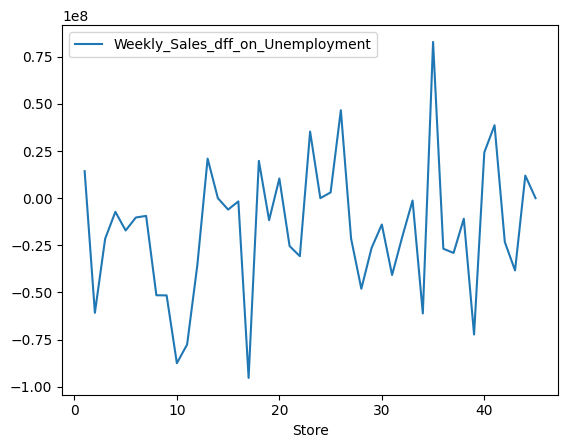

In [19]:
Weekly_Sales_on_max_min_Unemployment.plot(x="Store",y="Weekly_Sales_dff_on_Unemployment")

# b. If the weekly sales show a seasonal trend, when and what could be the reason?

Step 1: created a new data frame DateWise_Weekly_Sales to summarise weekly sales using datewise to find out if there is a seasonal trend for all stores.

In [20]:
DateWise_Weekly_Sales = w_data.groupby(["Date"])["Weekly_Sales"].sum()
DateWise_Weekly_Sales = DateWise_Weekly_Sales.to_frame(name="Weekly_Sales").reset_index()
DateWise_Weekly_Sales.set_index('Date', inplace=True)
DateWise_Weekly_Sales.head()

,Weekly_Sales
Date,
01-04-2011,43458991.19
01-06-2012,48281649.72
01-07-2011,47578519.50
01-10-2010,42239875.87
02-03-2012,46861034.97


Step 2: Below plot clearly shows that there is a seasonal trend.

<Figure size 640x480 with 0 Axes>

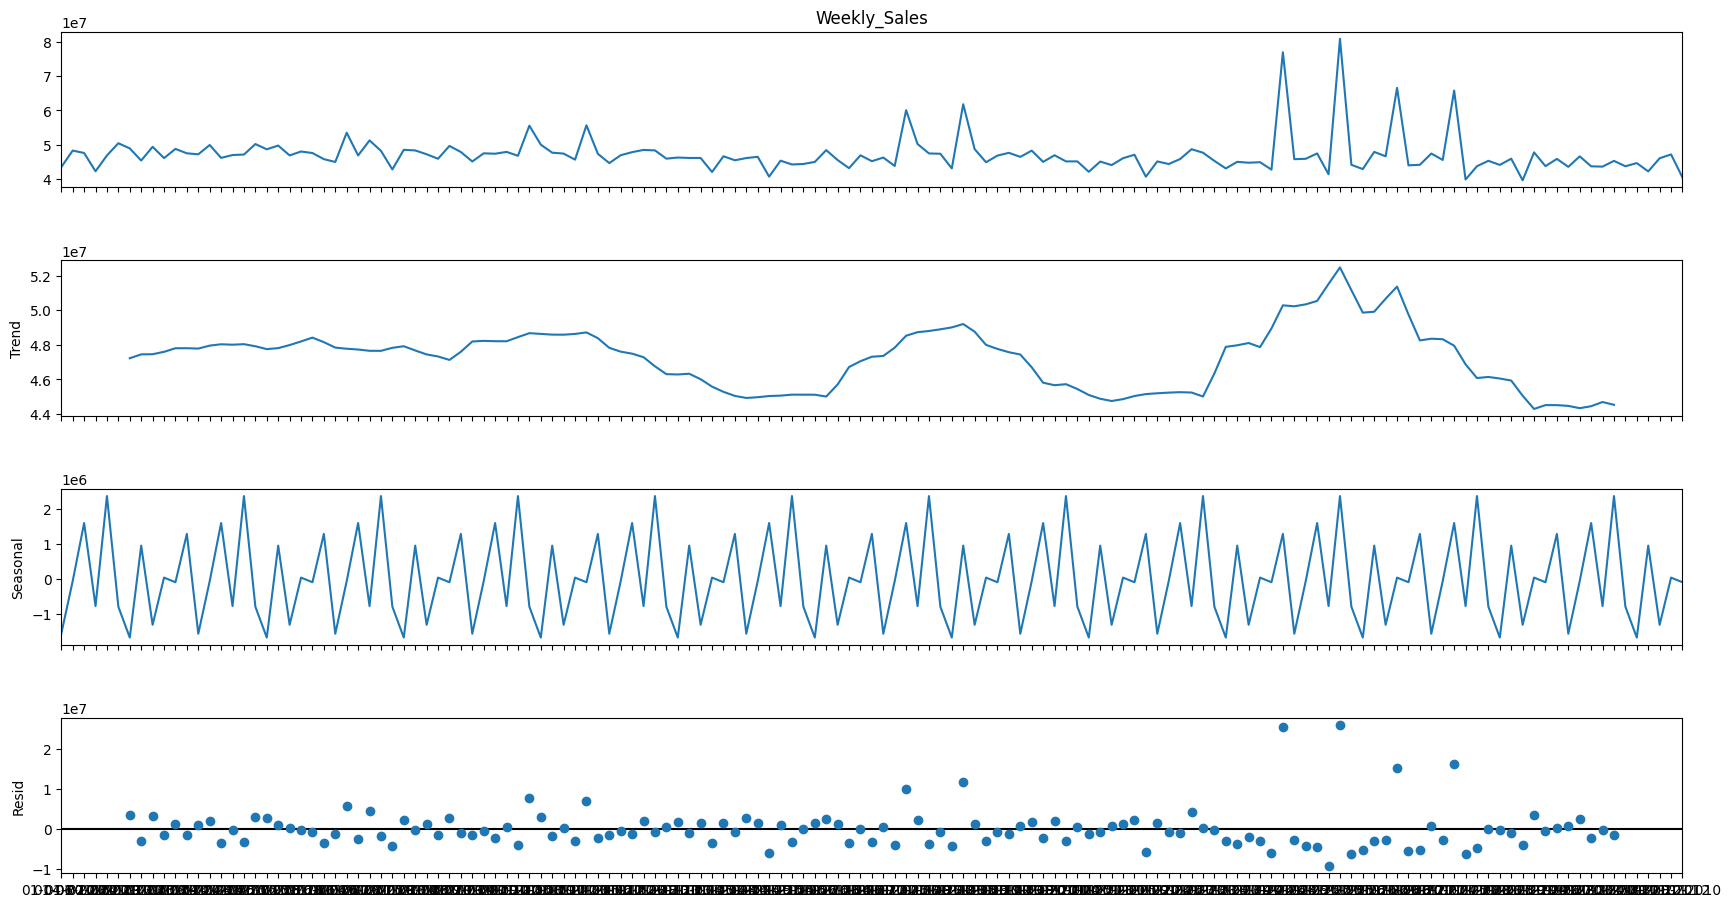

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(DateWise_Weekly_Sales.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(20, 10)
plt.show()

# c. Does temperature affect the weekly sales in any manner?

Step 1: created a data frame temperature_df to get weekly sales temerature wise.

In [22]:
temperature_df = w_data.groupby(["Temperature"])["Weekly_Sales"].sum()
temperature_df =temperature_df.to_frame(name="Weekly_Sales").reset_index()  #TemperatureWise
temperature_df["Temperature"]=temperature_df["Temperature"].astype(int)
temperature_df = temperature_df.groupby(["Temperature"])["Weekly_Sales"].sum()
temperature_df = temperature_df.to_frame(name="Weekly_Sales").reset_index() 
temperature_df

,Temperature,Weekly_Sales
0,-2,558027.77
1,5,817485.14
2,6,1083071.14
3,7,593875.46
4,9,1810029.64
...,...,...
91,96,3962486.82
92,97,3526195.64
93,98,471040.67
94,99,2922919.68


Step 2: ploted the data frame temperature_df to see the trend, and it shows YES the temerature affects the weekly sales.

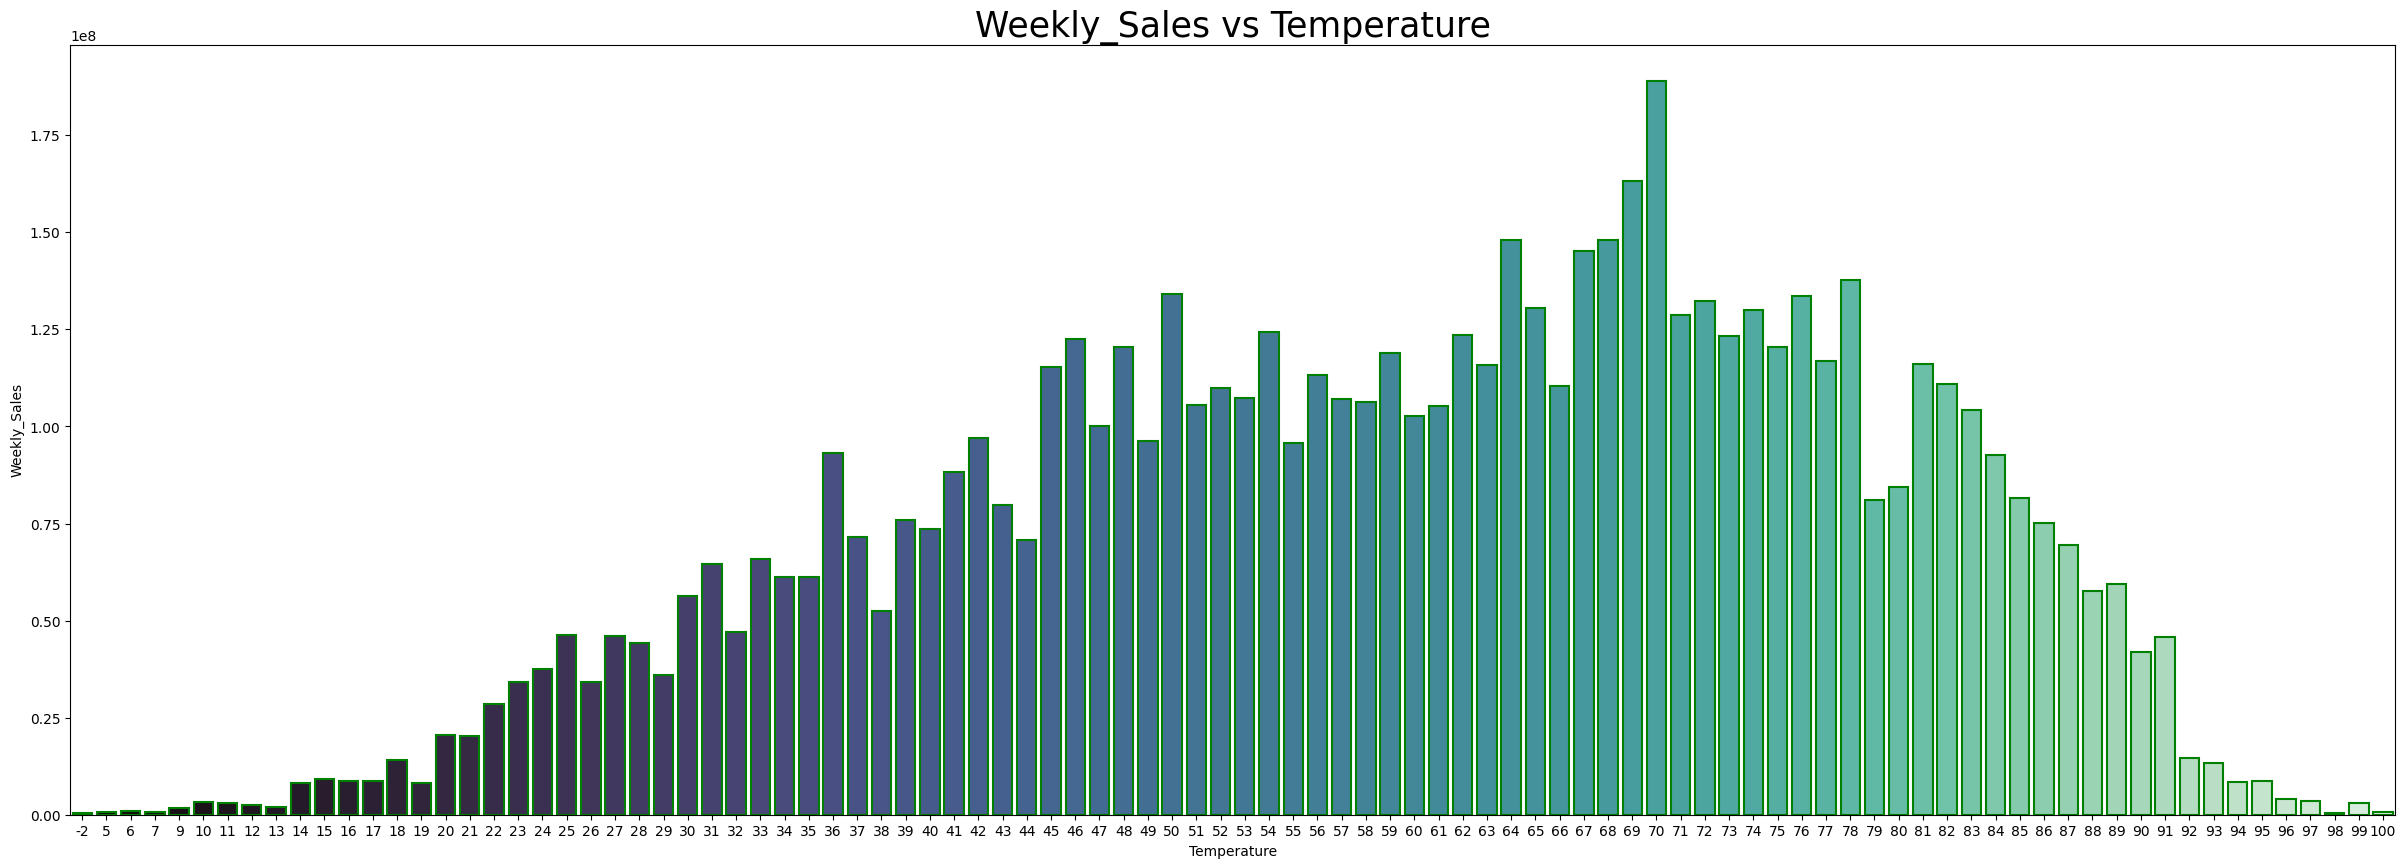

In [23]:
fig = plt.figure(figsize=(30,10))
plt.title("Weekly_Sales vs Temperature", size=25)
ax=sns.barplot(data=temperature_df, y="Weekly_Sales",x="Temperature", linewidth = 1.5, edgecolor='green', palette='mako')

# d. How is the Consumer Price index affecting the weekly sales of various stores?

Step 1: Created a data frame cpi_weekly_sales to get CPIwise Weekly Sales.

In [24]:
# cpi_storewise = pd.pivot_table(w_data, values = "CPI", index = "Store")
cpi_weekly_sales = w_data.groupby(["CPI"])["Weekly_Sales"].sum()
cpi_weekly_sales = cpi_weekly_sales.to_frame(name="Weekly_Sales").reset_index()
cpi_weekly_sales["CPI"] = cpi_weekly_sales["CPI"].astype(int)
cpi_weekly_sales = cpi_weekly_sales.groupby(["CPI"])["Weekly_Sales"].sum()
cpi_weekly_sales = cpi_weekly_sales.to_frame(name="Weekly_Sales").reset_index()
cpi_weekly_sales.head()

,CPI,Weekly_Sales
0,126,5.443978e+08
1,127,8.818016e+07
2,128,1.140594e+08
3,129,4.068960e+08
4,130,3.538316e+08


Step 1: Ploted graph from the data frame cpi_weekly_sales.

Text(0, 0.5, 'CPI')

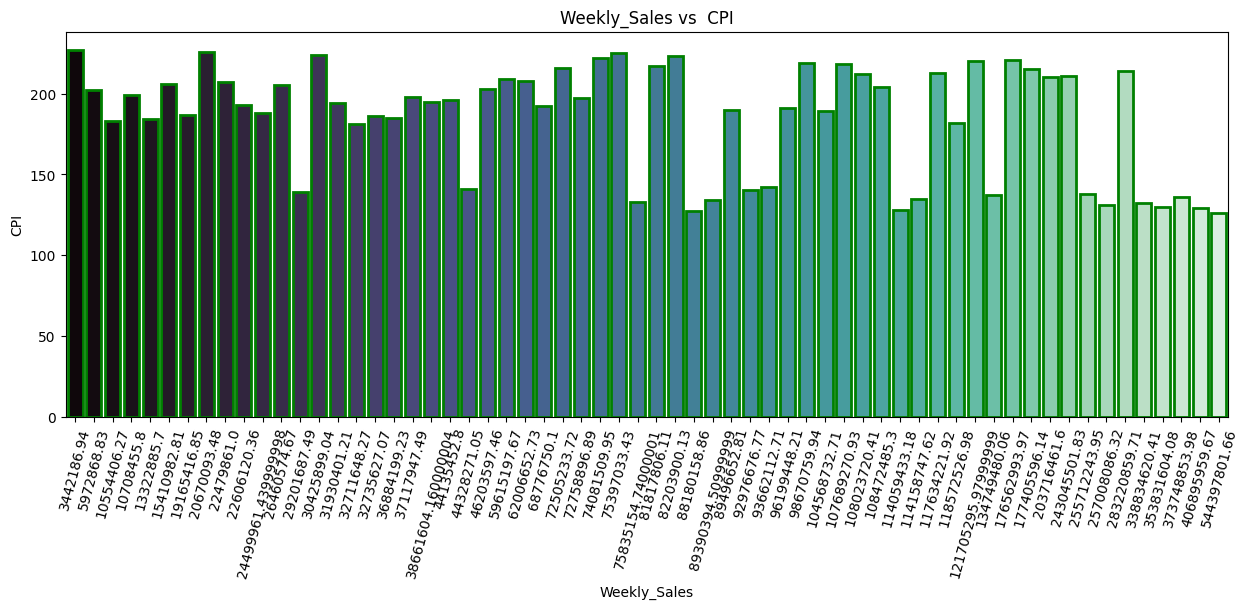

In [25]:
plt.figure(figsize=(15, 5))
ax=sns.barplot(data=cpi_weekly_sales.reset_index(), x="Weekly_Sales",y="CPI", linewidth = 2, edgecolor='green', palette='mako')
plt.xticks(rotation=75)
plt.title('Weekly_Sales vs  CPI')
plt.xlabel('Weekly_Sales')
plt.ylabel('CPI')

Conclusion: Above graph shows CPI affects weekly sales. It shows when CPI is high the weekly sales comes down.

# e. Top performing stores according to the historical data.

Step 1: Created a data frame storewise to get storewise Weekly sales data.

In [26]:
storewise = pd.pivot_table(w_data, values=["Weekly_Sales"], index="Store", aggfunc=max) #"", Unemployment
storewise.head()

,Weekly_Sales
Store,
1,2387950.20
2,3436007.68
3,605990.41
4,3676388.98
5,507900.07


Step 1: Plotted the storewise data frame to see the trend.

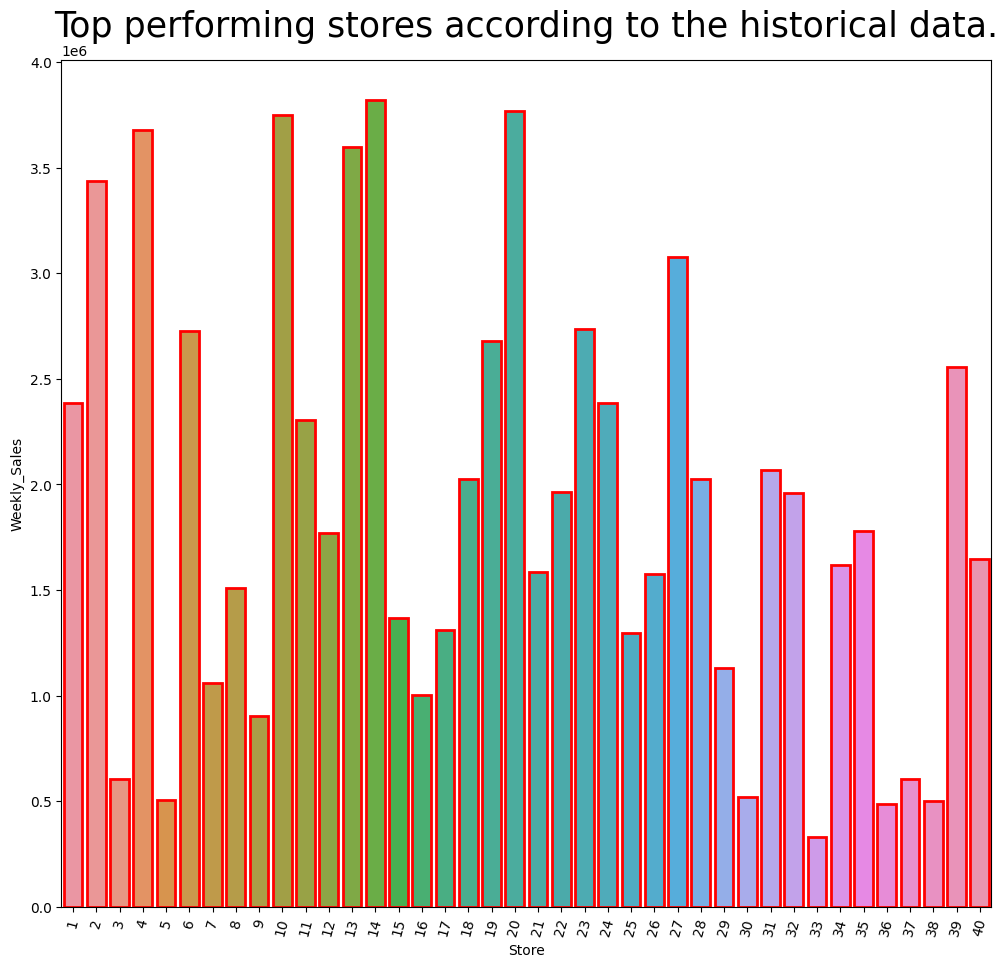

In [27]:
fig = plt.figure(figsize=(12,11))
top_10_performing_storess=storewise.reset_index()
top_10_performing_storess
plt.title("Top performing stores according to the historical data.", size=25)
plt.xticks(rotation=75)
ax=sns.barplot(data=top_10_performing_storess.iloc[:40], x="Store",y="Weekly_Sales", linewidth = 2, edgecolor='red')

Step 3: Sorted the Weekly_Sales data in decending order and stored it in the data frame storewise data 

In [28]:
storewise = storewise.sort_values(by=["Weekly_Sales"], ascending=[False])
storewise.head(10)

,Weekly_Sales
Store,
14,3818686.45
20,3766687.43
10,3749057.69
4,3676388.98
13,3595903.20
2,3436007.68
27,3078162.08
23,2734277.10
6,2727575.18


# f. The worst performing store, and how significant is the difference between the highest and lowest performing stores

Step 1: Reuse the sorted data frame storewise on the Weekly_Sales. The data frame shows the storewise Weekly sales in decending order.

In [29]:
storewise.style.background_gradient(cmap="cubehelix")

,Weekly_Sales
Store,
14,3818686.450000
20,3766687.430000
10,3749057.690000
4,3676388.980000
13,3595903.200000
2,3436007.680000
27,3078162.080000
23,2734277.100000
6,2727575.180000


Step 2: Created a data frame highest_performing_store to get store with highest weekly sales.

In [30]:
highest_performing_store = storewise[storewise["Weekly_Sales"]==storewise["Weekly_Sales"].max()]

Step 3: Created a data frame lowest_performing_store to get store with lowest weekly sales.

In [31]:
lowest_performing_store = storewise[storewise["Weekly_Sales"]==storewise["Weekly_Sales"].min()]

Step 4: Getting difference of highest weekly sales and lowest weekly sales.

In [32]:
difference_between_highest_and_lowest_performing_stores = highest_performing_store["Weekly_Sales"].values[0] - lowest_performing_store["Weekly_Sales"].values[0]
difference_between_highest_and_lowest_performing_stores

3487512.9400000004

Conclusion: total variance is 2389197.9825 between highest and lowest weekly sales.

In [33]:
# storewise.iloc[:10]

# Choosing the Algorithm For the Project

<!-- ###### Description for the XYZ algorithm for the project. -->

### Introduction on Time Series Forecasting
A time series is a collection of data points that are recorded over time and can be used to identify patterns and trends. Time series analysis is a statistical technique that can be used to extract meaningful insights from such data. It can help identify the factors that influence certain variables over time, such as asset prices, economic indicators, or other variables. By analyzing time series data, we can gain a better understanding of how these variables change over time and make more informed decisions based on this knowledge.

As we can see the data that shows weekly sales based on specific time, hece I will use Time Series Forecasting algorith to predict the sales.

I have chosen the XYZ algorithm for this project for the following reasons:
1. Reason 1 and so on.

I have choosen one of the Time Series method i.e. Prophet.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

### Why I have chosen the algorithm?
      Here is the following reasons for choosing the algorithm:
    1.	Accuracy and speed: Prophet is known for its accuracy and speed. It is widely used across Facebook for generating reliable forecasts to aid in planning and goal setting.
    2.	Fully automatic: Prophet is designed to be fully automatic. It can generate reasonable forecasts even when working with messy data, without requiring manual effort.
    3.	Tunable forecasts: Prophet provides adjustable forecasts, allowing users to tweak and adjust them as needed. By incorporating domain knowledge and using human-interpretable parameters, forecasts can be further improved.
    4.	Available in R or Python: The Prophet procedure can be implemented in either R or Python, making it accessible to users of both programming languages.
    5.	Handles seasonal variations well: Prophet is capable of accommodating seasonality with multiple periods, making it suitable for analyzing time series data with recurring patterns.
    6.	Robust to outliers: Prophet is robust to outliers and can handle them effectively by removing them from the analysis.
    7.	Robust to missing data: Prophet is resilient to missing data, allowing users to work with incomplete datasets without compromising the quality of the forecasts.


# Assumptions
The following assumptions were made in order to create the model for Walmart project.


1. I will use the weekly sales data provided in LMS, which can be downloaded from there.It consists of historical sales data for 45 Walmart stores. Each store contains a number of departments, and our objective is to predict the sales for each store.
2. Since, no method mentioned in the project to apply for prediction, I will apply Prophet method to forecast the sales for each store based on time series model.

# Model Evaluation and Technique
The following techniques and steps were involved in the evaluation of the model

#### I have created the following local methods for reusable purpose in a separate python file CSV_EDA.py
    1. displayOutlierForAllcolumns :- To display outlier for all columns.
    2. remove_outlier :- This function will be used to remove outlier, it also accept which columns needs to be excluded from removing outliers.
    3. SplitTrainTest : I have created my own method to split data set for Training and Testing purpose. It accepts data frame and percentage.
    4. getStorewiseForcast :- This method will call the method SplitTrainTest,and will create a Phorphet model which will predict data for a store. It accepts three parameters 1st data to accept data frame,2nd store to get store number,3rd forcastColumn : it is used to get the column name that has to be forcasted.  


### 1. Technique 1 : Detecting Outliers and removing outlier for better predictions.

In [34]:
w_data.shape # Checking shape of the data

(6435, 8)

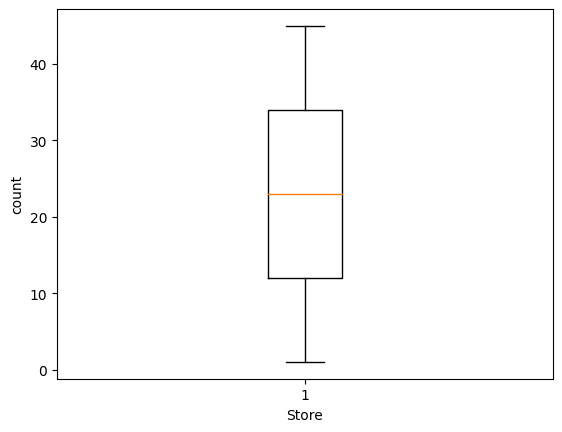

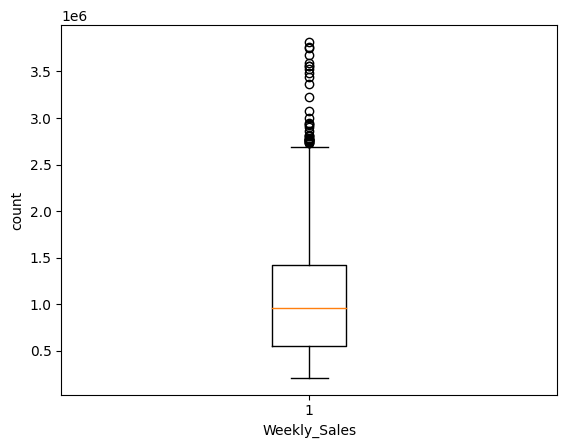

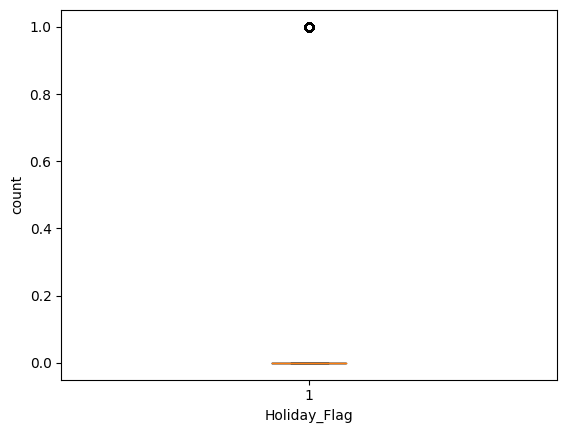

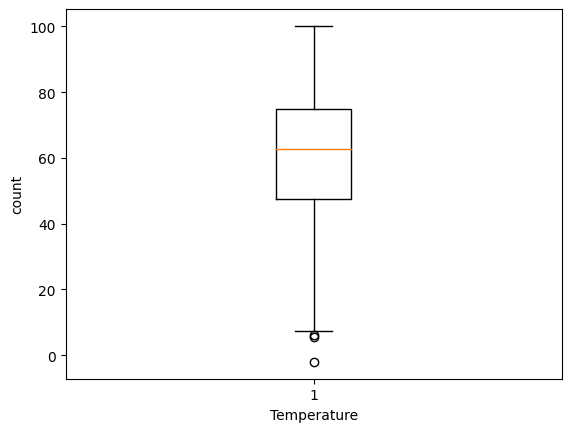

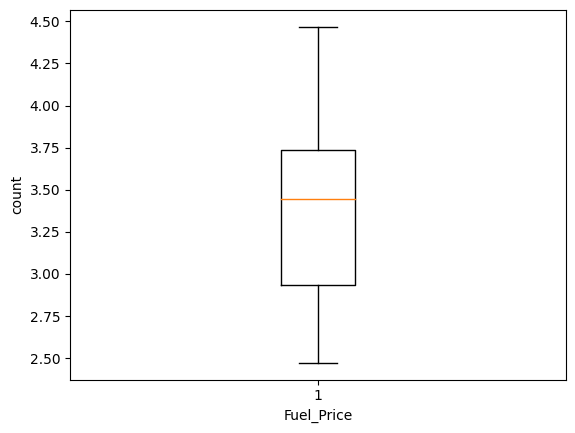

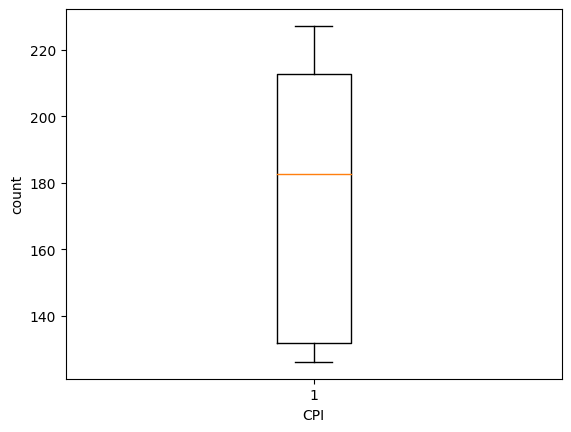

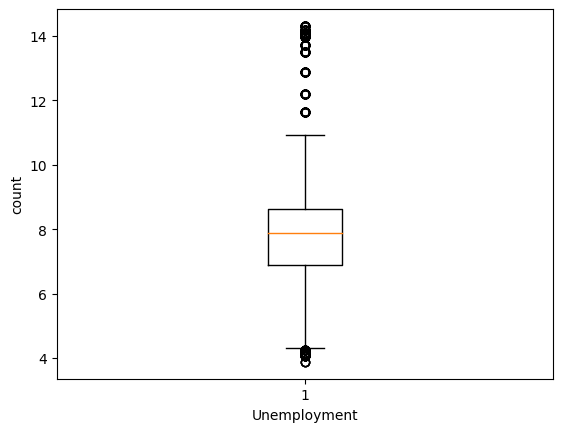

In [35]:
csvRader.displayOutlierForAllcolumns()

#### 1. Technique 1.1. A generic method is created to remove outlier it also accept column name to exclud to remove outlier. I have excluded Holiday_flag as the above plot doesn't show complete box plot hence, I have excelued the column from removing outlier.

In [36]:
csvRader.remove_outlier(excludeColumns="Holiday_Flag")

Store 23.0 -21.0 67.0
Weekly_Sales 960746.04 -746862.7275 2720371.4924999997
Holiday_Flag 0.0 0.0 0.0
Temperature 62.67 6.240000000000002 116.16
Fuel_Price 3.445 1.7299999999999998 4.938
CPI 182.6165205 10.222559825000019 334.255733625
Unemployment 7.874 4.2945 11.218499999999999


Technique 1.2. Again call the displayOutlierForAllcolumns method to display outliers for all columns.

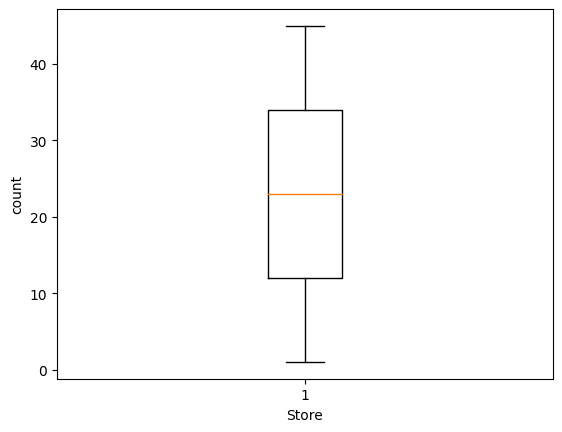

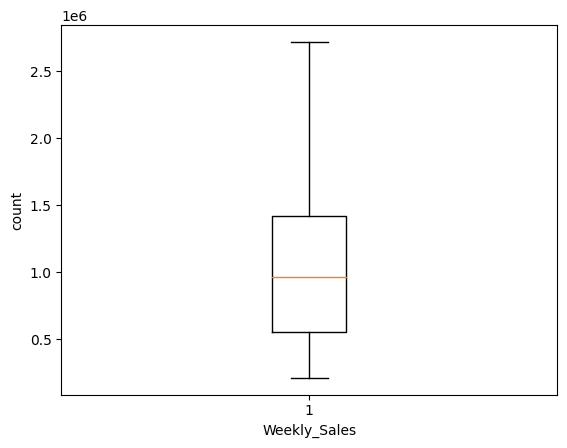

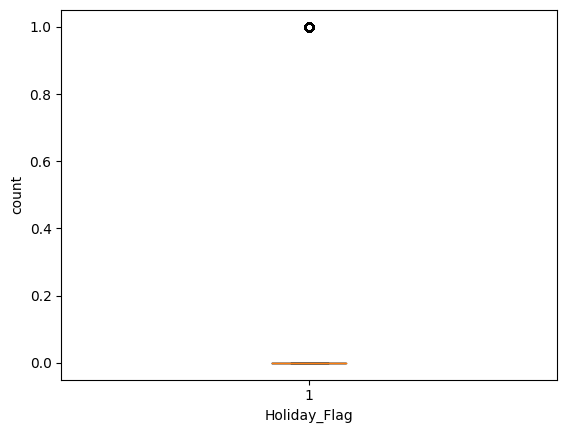

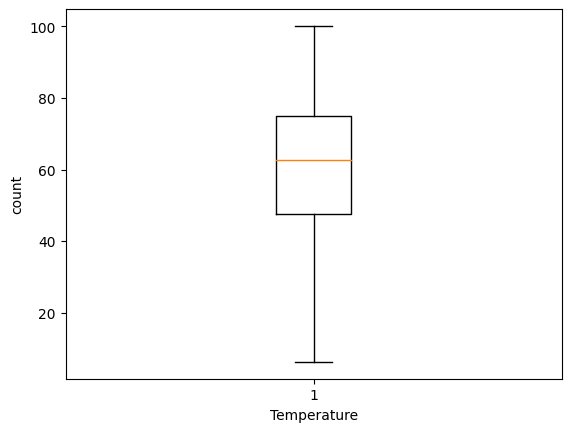

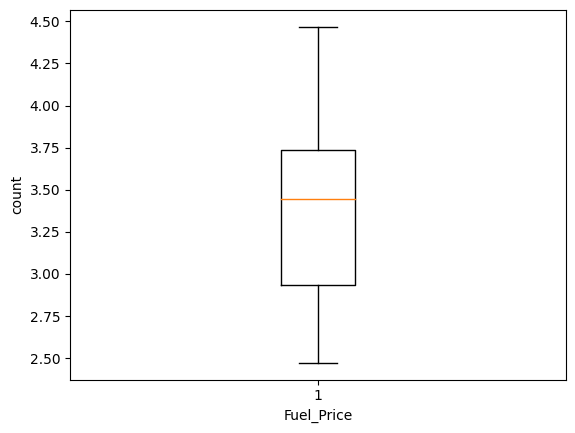

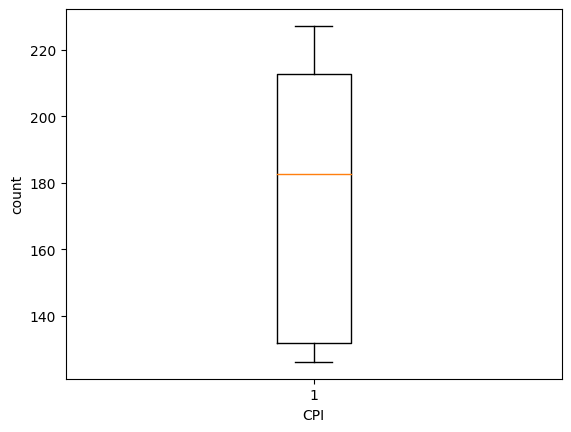

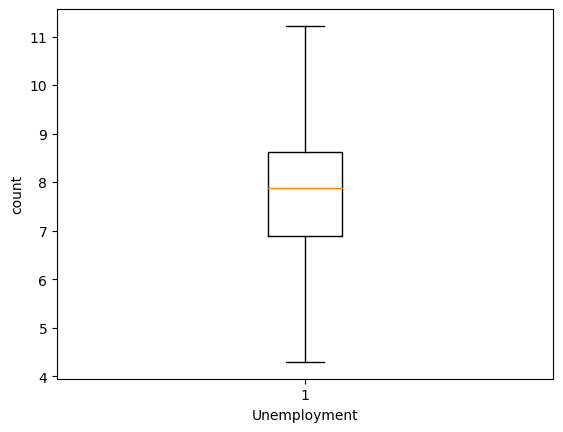

In [37]:
csvRader.displayOutlierForAllcolumns()

#### 2. Technique 2.1 : Converting the date column from object type to date type

In [38]:
w_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   float64
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 402.3+ KB


In [39]:
w_data["Date"]=pd.to_datetime(w_data["Date"], format='%d-%m-%Y')
w_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1.0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1.0,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1.0,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1.0,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1.0,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [40]:
w_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   float64       
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 402.3 KB


#### 2. Technique 2.2 : Applying Date column as index of the dataframe.

In [41]:
w_data.set_index('Date', inplace=True)
w_data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1.0,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1.0,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1.0,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1.0,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1.0,1554806.68,0,46.50,2.625,211.350143,8.106


In [42]:
w_data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1.0,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1.0,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1.0,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1.0,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1.0,1554806.68,0,46.50,2.625,211.350143,8.106


### 3. Technique 3 : Applying Prophet time serires prediction technique.

###### Prerquisite for applying Porphet model is to Install Prophet using followng command.
!pip install prophet

#### 3. Technique 3.1 : I have used local method getStorewiseForcast for forcasting store no 7 for evaluation purpose, then I will use the same method to forcast each store.

20:25:46 - cmdstanpy - INFO - Chain [1] start processing
20:25:46 - cmdstanpy - INFO - Chain [1] done processing


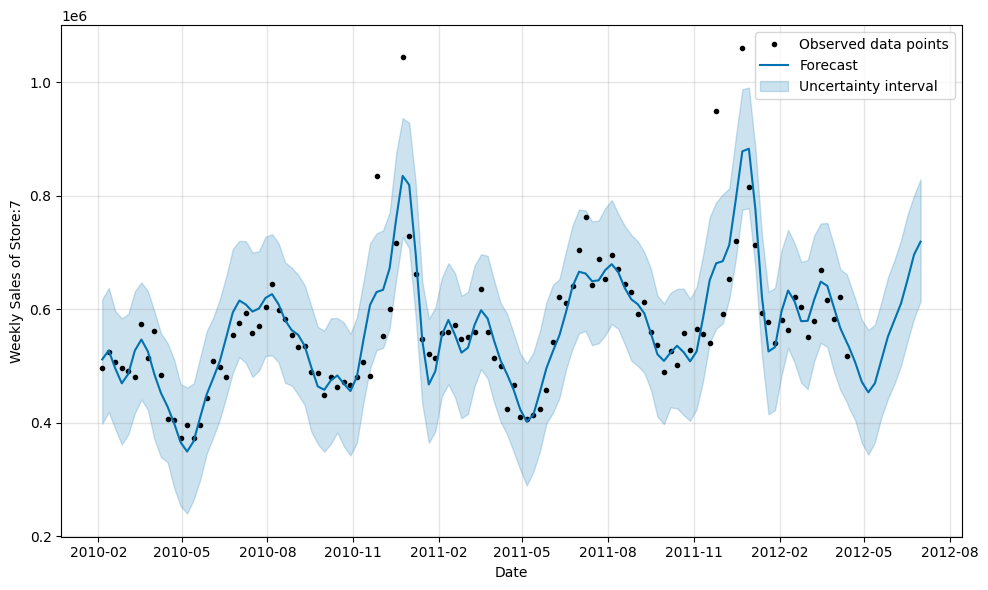

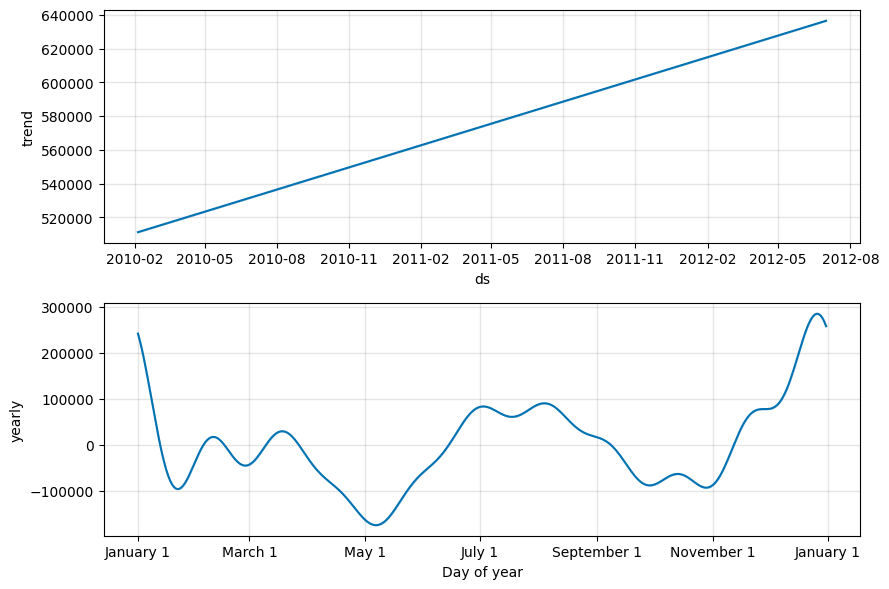

In [43]:
train, test, future, forecast = csvRader.getStorewiseForcast(data=w_data,store=7,forcastColumn="Weekly_Sales")

In [44]:
# storewise.shape

In [45]:
#train data has 115 rows and 2 columns
train.shape 

(115, 2)

In [46]:
#test data has 28 rows and 2 columns
test.shape

(28, 7)

In [47]:
# future data frame = number of data in train data set(115) + 12 weeks records = 127
future 

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
122,2012-06-03
123,2012-06-10
124,2012-06-17
125,2012-06-24


In [48]:
train.tail()

,ds,y
110,2012-03-16,669205.73
111,2012-03-23,615997.29
112,2012-03-30,583322.20
113,2012-04-06,621425.98
114,2012-04-13,517420.23


In [49]:
# forecast variable contains forcast data in yhat column. I have considered following important column from forecast data frame.
forecast =  forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
forecast.tail(20)

,ds,yhat,yhat_lower,yhat_upper
107,2012-02-24,578825.859798,470423.379373,683449.270074
108,2012-03-02,579423.136107,459121.850811,686402.342591
109,2012-03-09,616891.200508,508506.092048,729815.708082
110,2012-03-16,648523.733262,540657.387759,751038.317610
111,2012-03-23,641095.551906,533476.049055,752020.272170
112,2012-03-30,603706.267333,490592.467443,713680.831526
113,2012-04-06,566443.915614,457490.195140,670272.602085
114,2012-04-13,541042.288201,435913.032137,661034.136984
115,2012-04-15,534406.982892,426795.817898,651171.164775
116,2012-04-22,505981.788558,403638.087289,617864.080560


#### 3. Technique 3.1.1 : I have used local method getStorewiseForcast for forcasting all store no.

In [50]:
# here, I am reusing storewise that was used to find informatio about "Top performing stores according to the historical data" 
storewise.count()

Weekly_Sales    45
dtype: int64

In [51]:
store = storewise.index
store = store.sort_values().astype(int)

20:25:55 - cmdstanpy - INFO - Chain [1] start processing
20:25:55 - cmdstanpy - INFO - Chain [1] done processing
20:25:56 - cmdstanpy - INFO - Chain [1] start processing
20:25:56 - cmdstanpy - INFO - Chain [1] done processing
20:25:56 - cmdstanpy - INFO - Chain [1] start processing
20:25:57 - cmdstanpy - INFO - Chain [1] done processing
20:25:57 - cmdstanpy - INFO - Chain [1] start processing
20:25:57 - cmdstanpy - INFO - Chain [1] done processing
20:25:58 - cmdstanpy - INFO - Chain [1] start processing
20:25:58 - cmdstanpy - INFO - Chain [1] done processing
20:25:58 - cmdstanpy - INFO - Chain [1] start processing
20:25:58 - cmdstanpy - INFO - Chain [1] done processing
20:25:59 - cmdstanpy - INFO - Chain [1] start processing
20:25:59 - cmdstanpy - INFO - Chain [1] done processing
20:25:59 - cmdstanpy - INFO - Chain [1] start processing
20:25:59 - cmdstanpy - INFO - Chain [1] done processing
20:26:00 - cmdstanpy - INFO - Chain [1] start processing
20:26:00 - cmdstanpy - INFO - Chain [1]

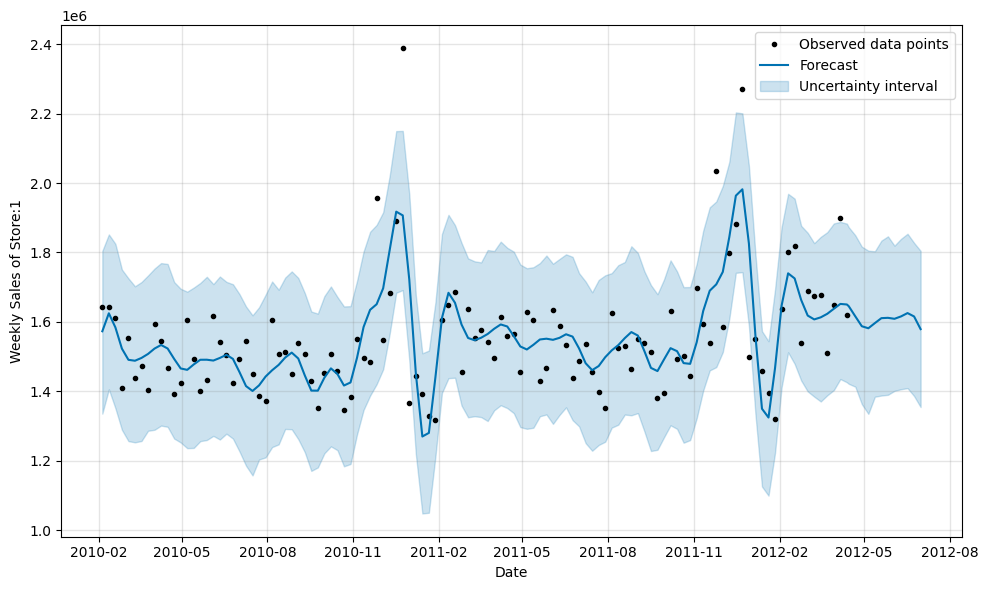

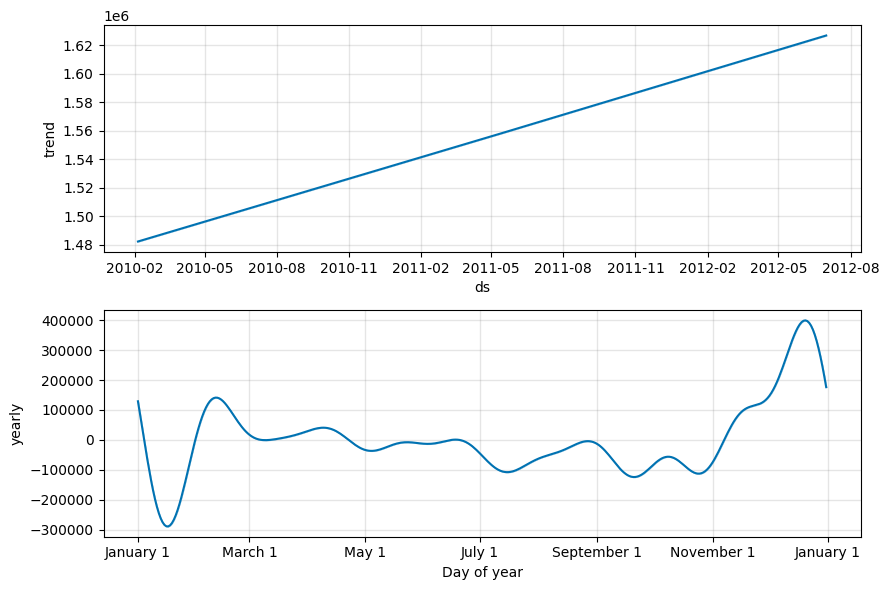

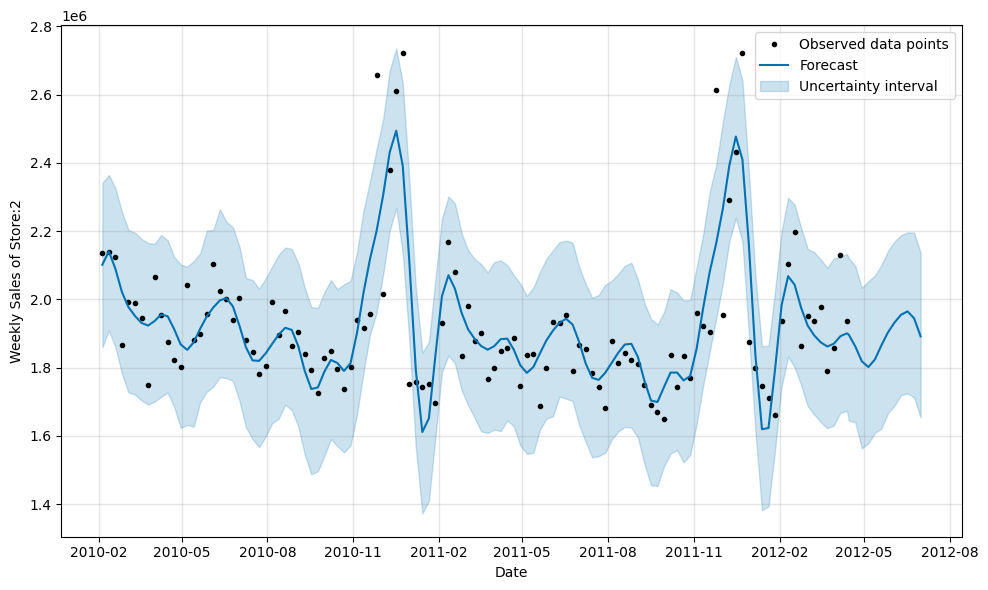

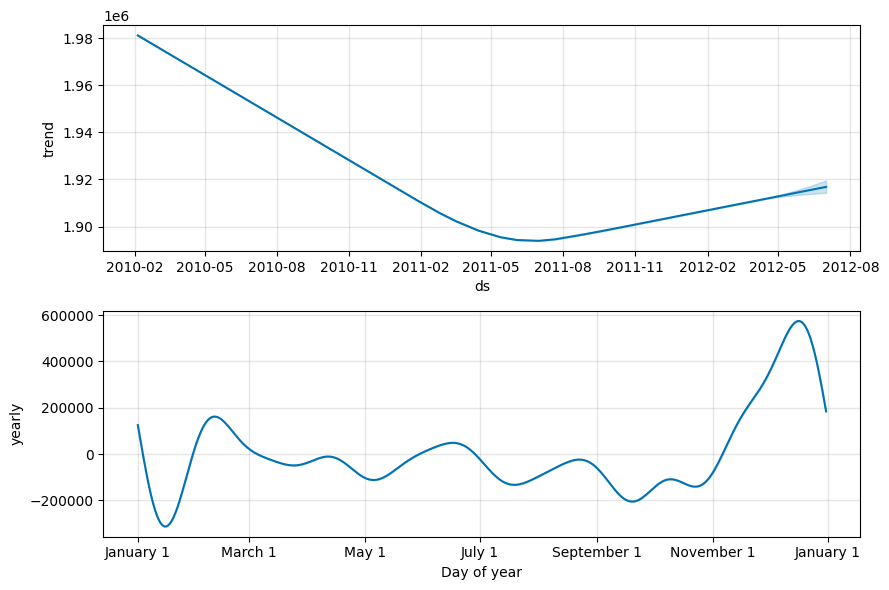

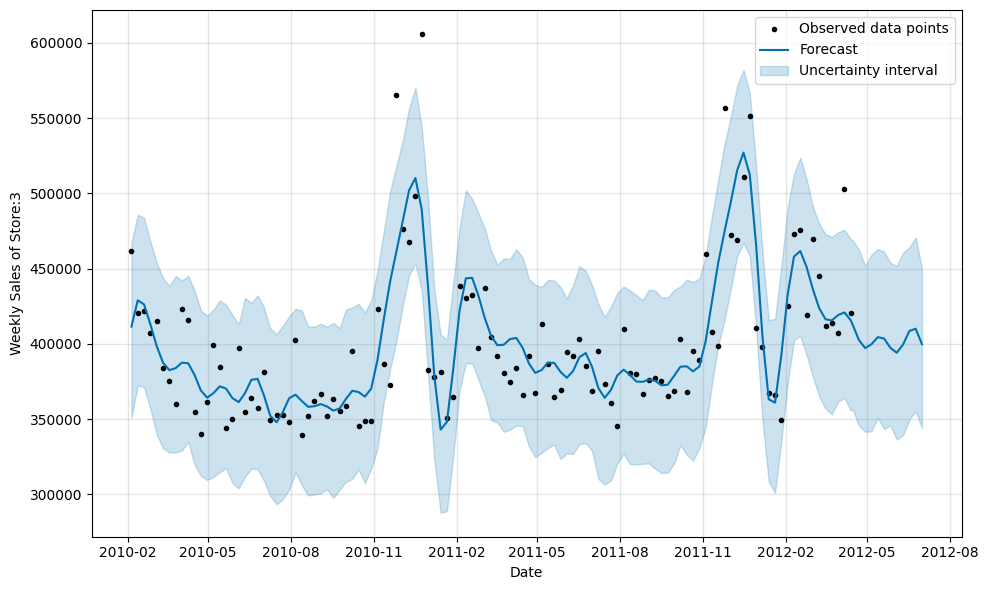

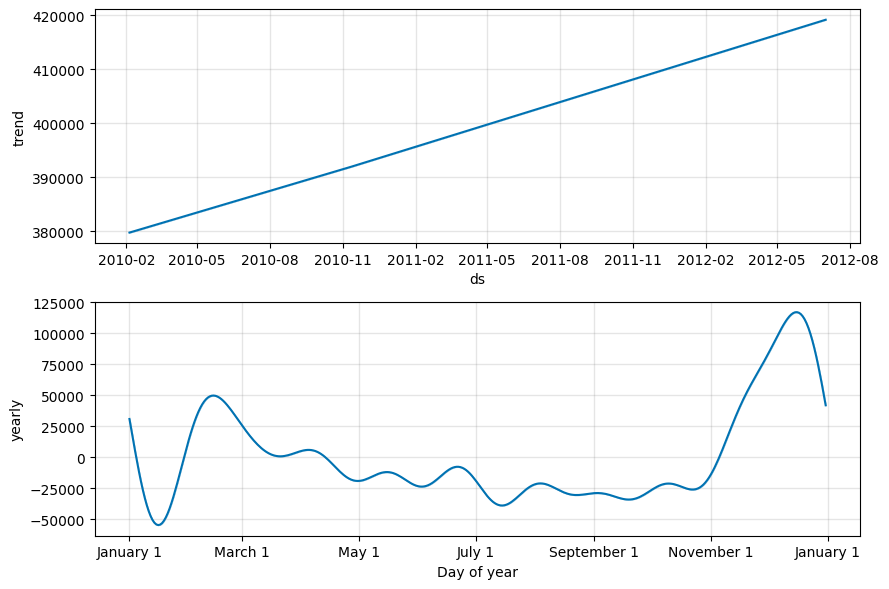

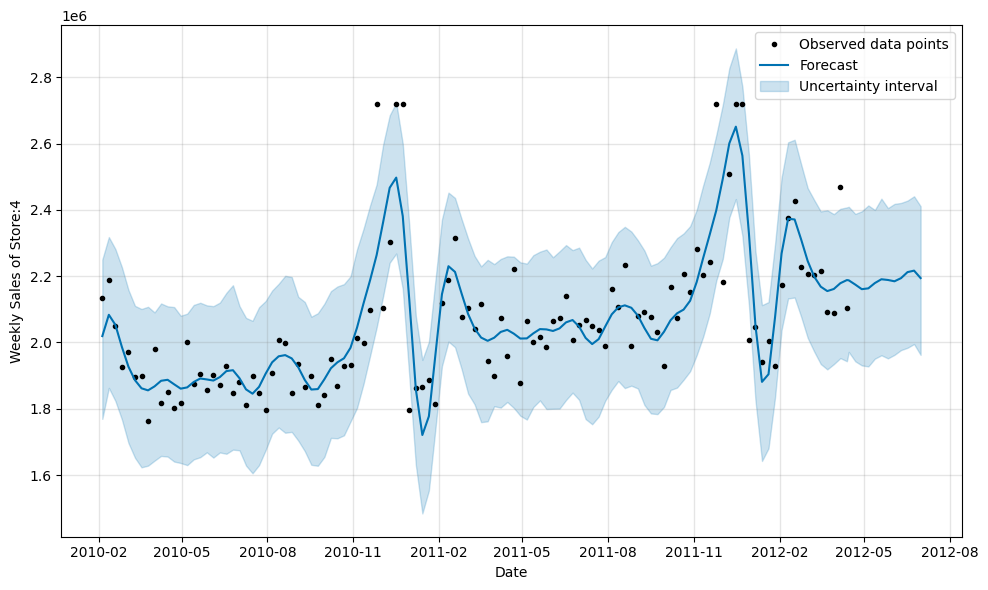

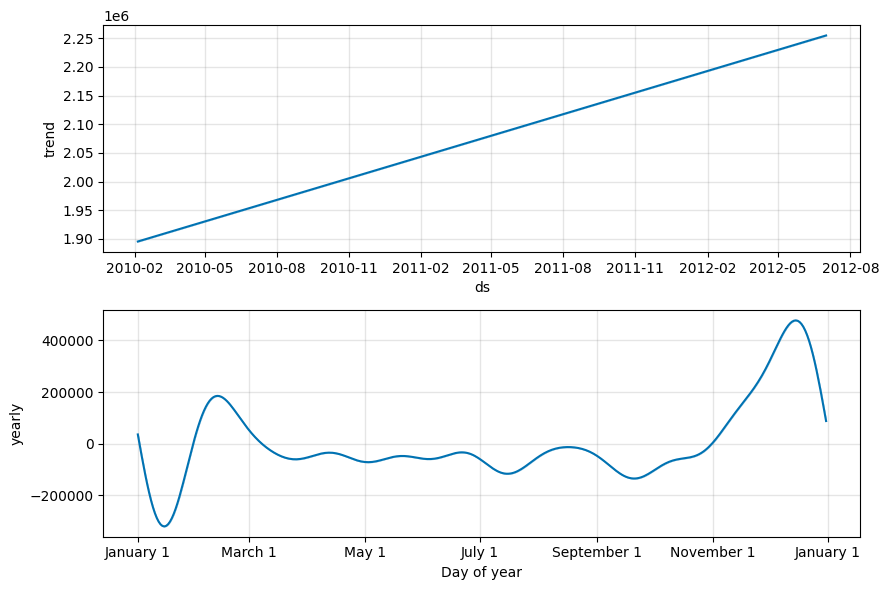

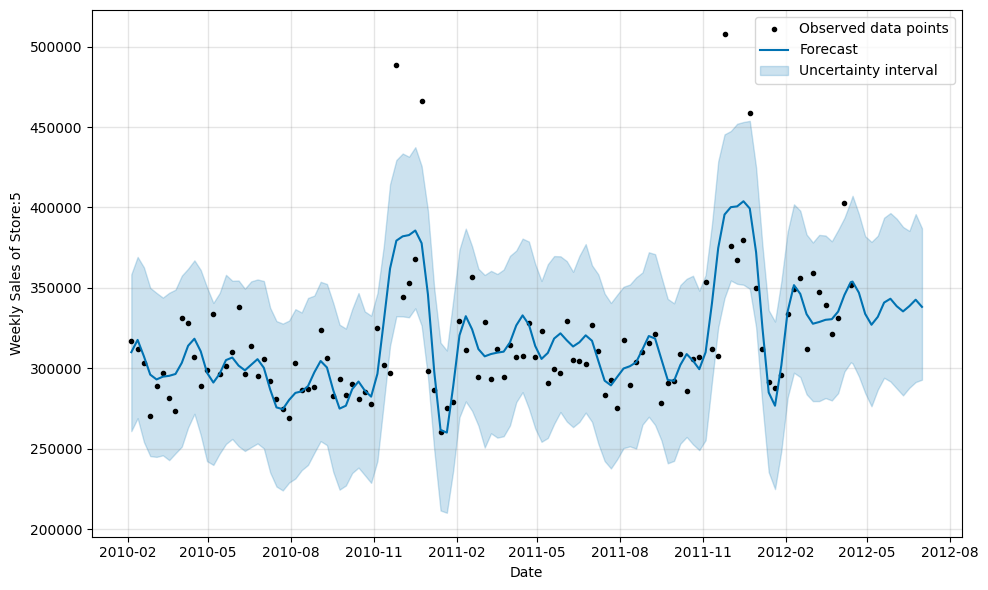

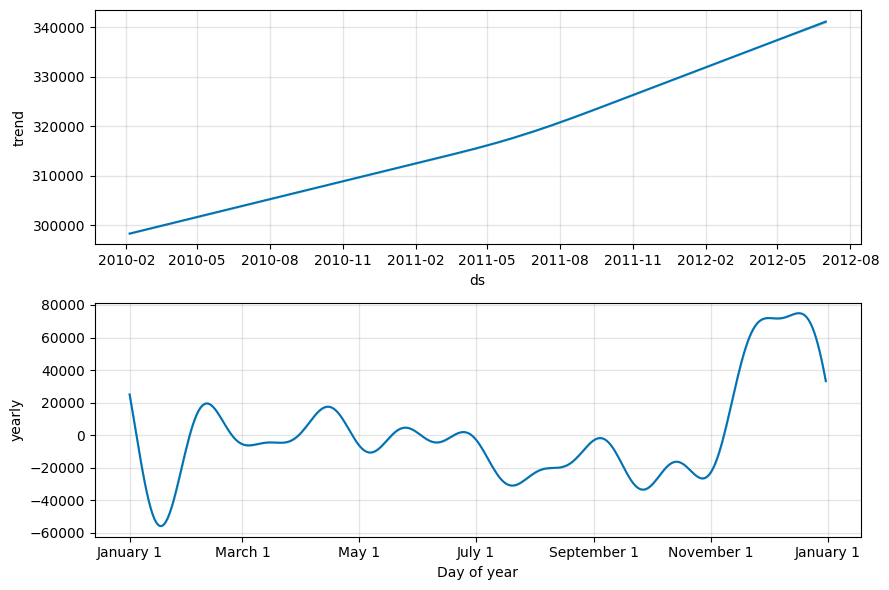

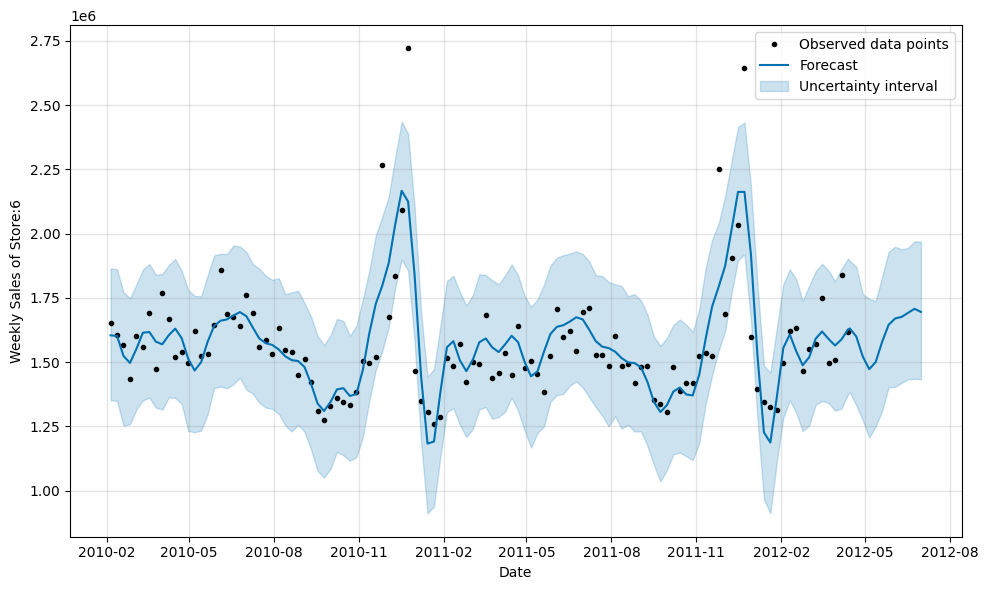

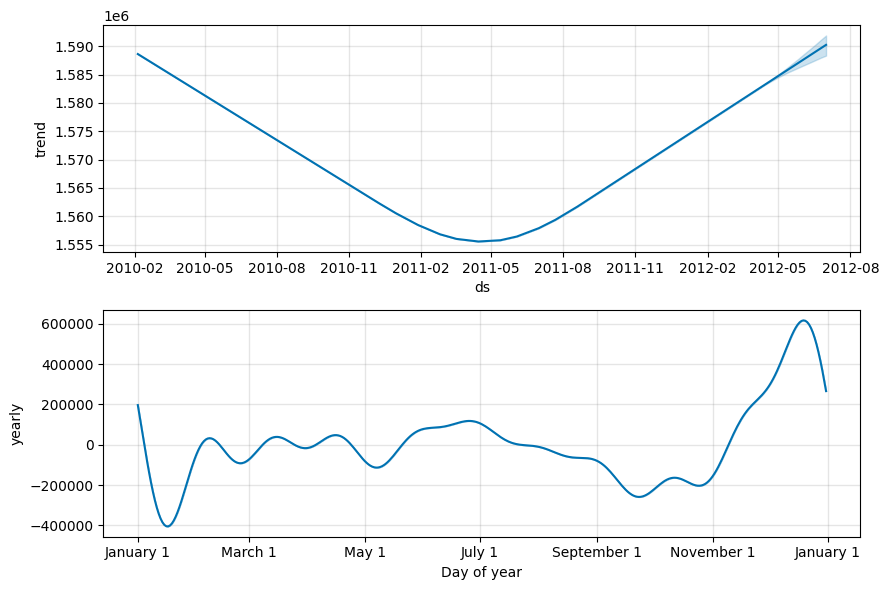

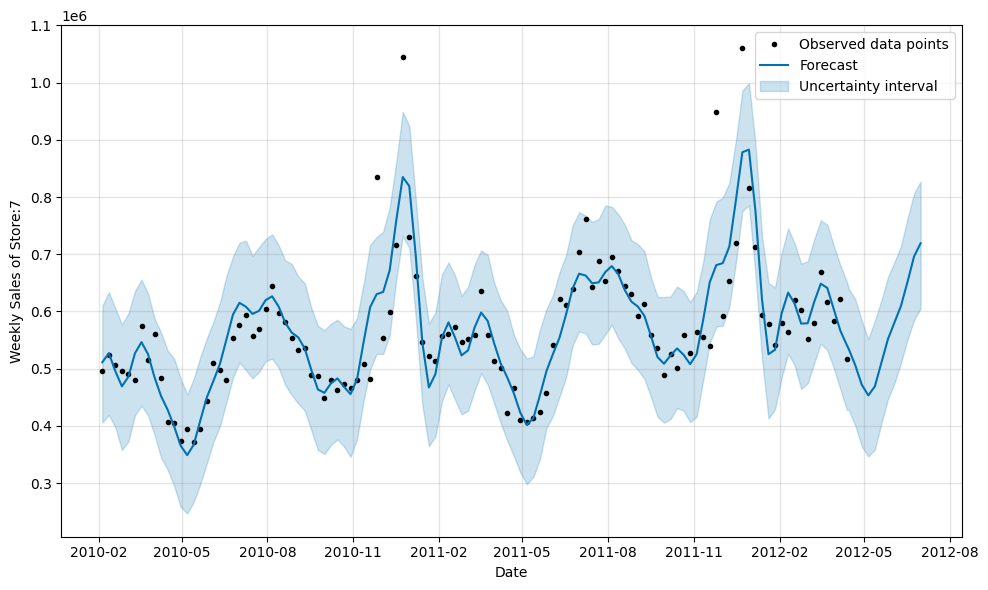

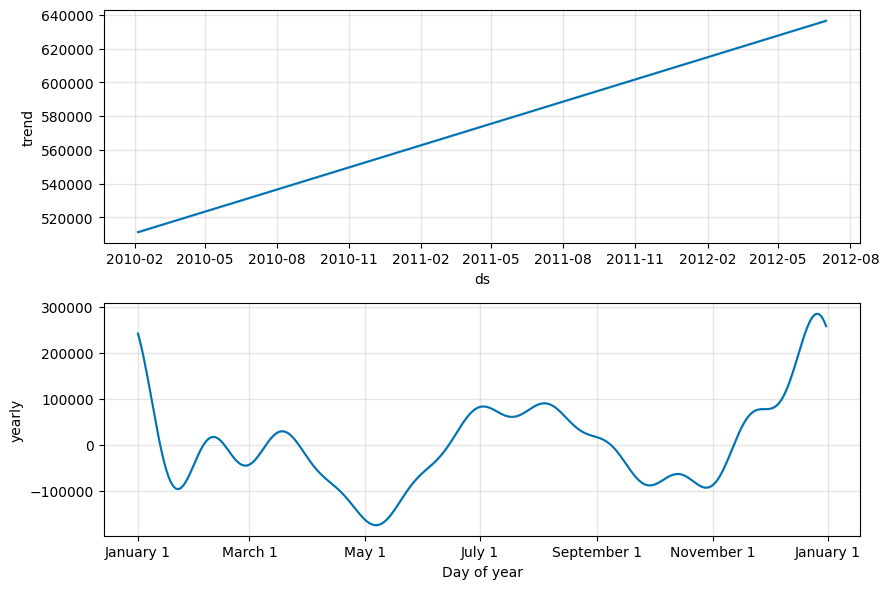

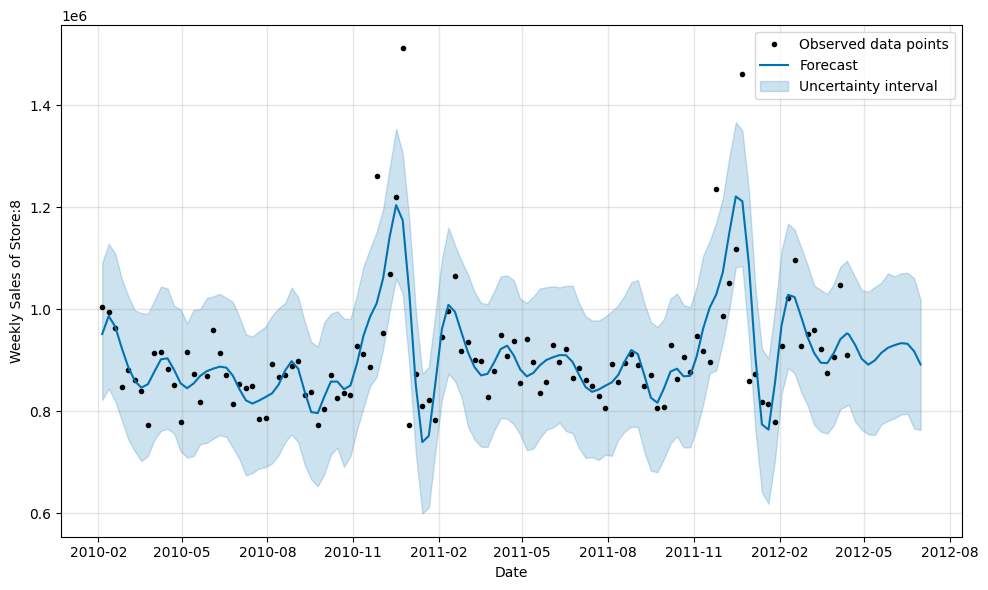

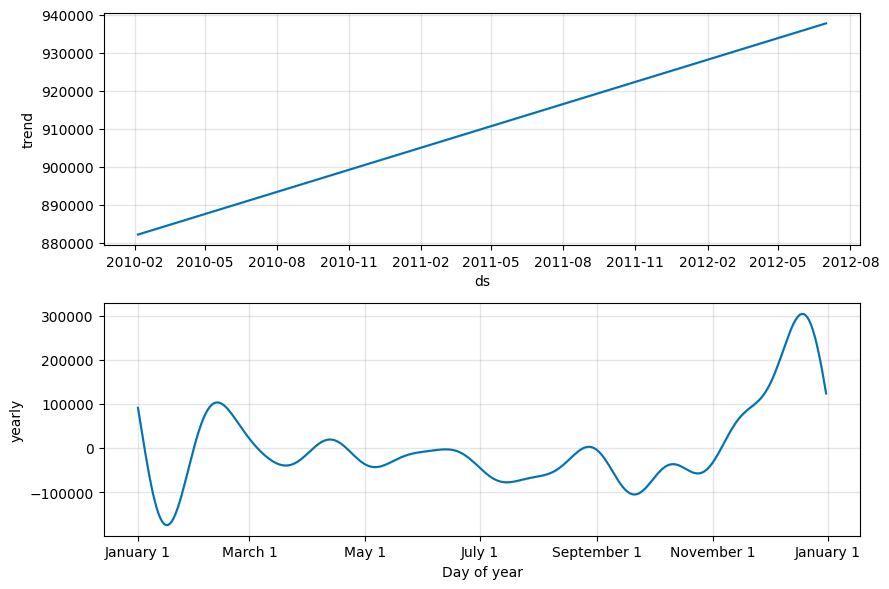

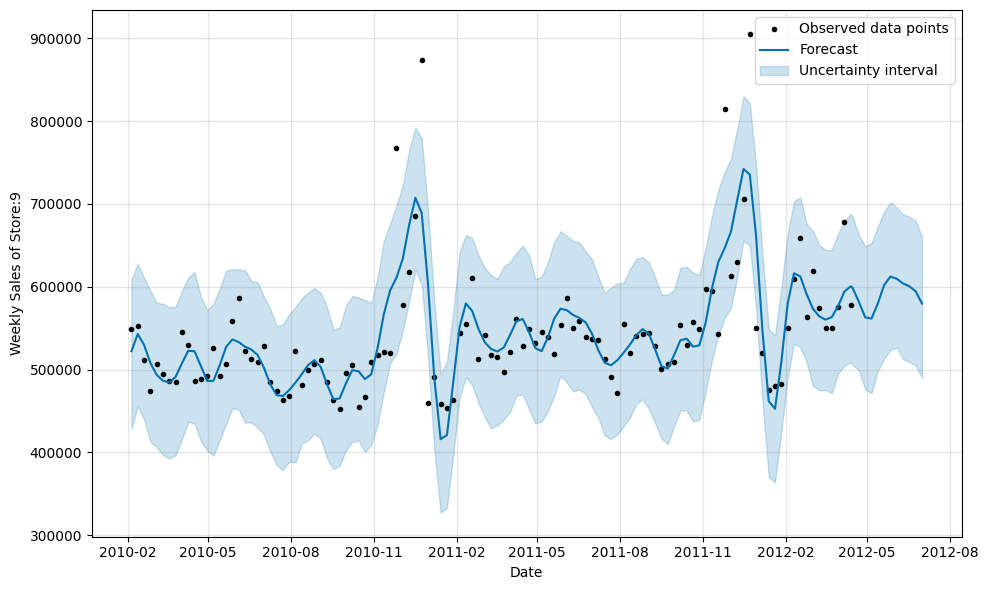

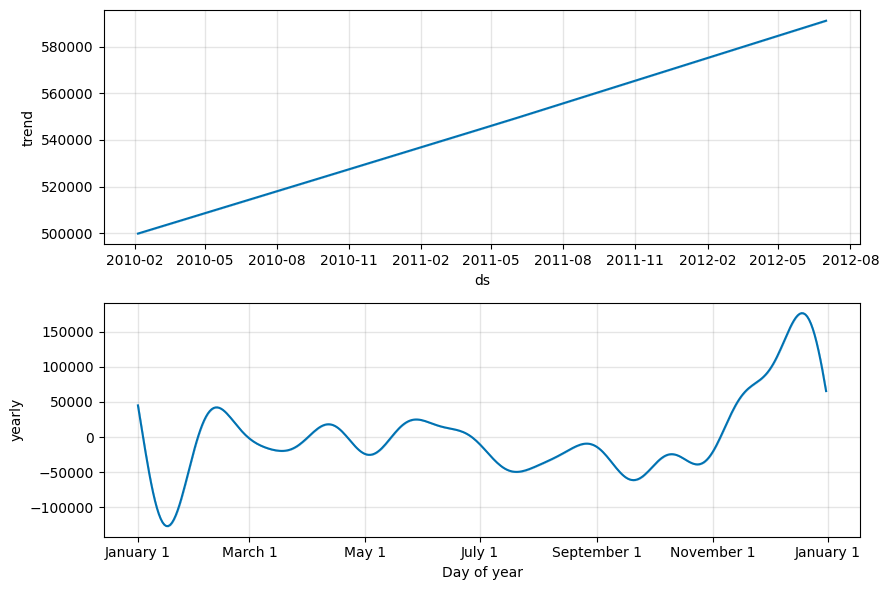

In [ ]:
for store in store:
    train, test, future, forecast = csvRader.getStorewiseForcast(data=w_data,store=store,forcastColumn="Weekly_Sales")

The evaluation report suggests the following:
1. Inferences from the evaluation : This algorithm is very flexible as it allows us to add multiple seasonal components and additional regressors. This algorithm easily works with missing data with several outliers and it can generate results in seconds.

At its core, the Prophet procedure is an additive regression model with four main components:

A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data.
A yearly seasonal component modeled using Fourier series.
A weekly seasonal component using dummy variables.
A user-provided list of important holidays.

# Inferences from the Project


Here are some of the key outcomes of the project:
The Dataset was quiet small with just 6435 samples & after preprocessing 7.5% of the datasamples were dropped.
Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
It is safe to use multiple regression algorithm performed better than other algorithms, as their scores were quiet comparable & also they're more generalisable.
Prophet follows the sklearn model API.
First up, we create an instance of the Prophet class and then call its fit and predict methods.
The input to Prophet is always a dataframe with two columns - ds and y.
The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.
The y column must be numeric, and represents the measurement we wish to forecast.

# Future Possibilities
The future possibilities, limitations, ….

Not all forecasting problems can be solved by the same procedure. Prophet is optimized for the business forecast tasks we have encountered at Facebook, which typically have any of the following characteristics:

    1.	hourly, daily, or weekly observations with at least a few months (preferably a year) of history
    2.	strong multiple “human-scale” seasonalities: day of week and time of year
    3.	important holidays that occur at irregular intervals that are known in advance (e.g. the Super Bowl)
    4.	a reasonable number of missing observations or large outliers
    5.	historical trend changes, for instance due to product launches or logging changes
    6.	trends that are non-linear growth curves, where a trend hits a natural limit or saturate
We have found Prophet’s default settings to produce forecasts that are often accurate as those produced by skilled forecasters, with much less effort. 


# Conclusion
This algorithm is very flexible as it allows us to add multiple seasonal components and additional regressors. This algorithm easily works with missing data with several outliers and it can generate results in seconds.

# References

1. Intellipaat Timeseries Class on 30th July 2023 - https://colab.research.google.com/drive/1BIqvyvpQNW6QQcCS-i7AHPuJq8JfNAzU
2. https://research.facebook.com/blog/2017/2/prophet-forecasting-at-scale/